<a href="https://colab.research.google.com/github/neSTORY/CartoonGAN_modified/blob/main/chapter5_cat_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os, shutil
import numpy as np

In [4]:
os.makedirs("/content/drive/MyDrive/Colab Notebooks/keras_book/data/train")

In [5]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/keras_book/data/train.zip" -d "/content/drive/MyDrive/Colab Notebooks/keras_book/data/train"

In [6]:
original_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/keras_book/data/train/train"
base_dir = "/content/drive/MyDrive/Colab Notebooks/keras_book/data/cats_and_dogs_small"
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, "train")
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, "validation")
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, "test")
os.makedirs(test_dir, exist_ok=True)

train_cats_dir = os.path.join(train_dir, "cats")
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, "dogs")
os.makedirs(train_dogs_dir, exist_ok=True)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.makedirs(validation_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, "cats")
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, "dogs")
os.makedirs(test_dogs_dir, exist_ok=True)

In [7]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [8]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [9]:
fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [10]:
def copy_file(animal="dog", low=0, high=1000,dir=train_dogs_dir):
  fnames = [animal+".{}.jpg".format(i) for i in range(low,high)]
  for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(dir, fname)
    shutil.copyfile(src, dst)

In [11]:
copy_file()
copy_file(low=1000,high=1500,dir=validation_dogs_dir)
copy_file(low=1500,high=2000,dir=test_dogs_dir)

In [12]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(test_cats_dir)))

1000
500


In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

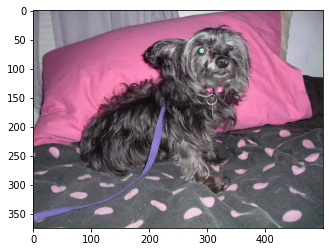

In [16]:
image = img.imread(train_dogs_dir+"/"+os.listdir(train_dogs_dir)[0])
plt.imshow(image)

In [17]:
import keras
import tensorflow as tf

In [18]:
optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["acc"])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
  print("배치 데이터 크기 :", data_batch.shape)
  print("배치 레이블 크기 :", labels_batch.shape)
  break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 19s 104ms/step - loss: 0.6884 - acc: 0.5465 - val_loss: 0.6689 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6542 - acc: 0.6110 - val_loss: 0.6335 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6020 - acc: 0.6820 - val_loss: 0.6029 - val_acc: 0.6670
Epoch 4/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5683 - acc: 0.7005 - val_loss: 0.5929 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5446 - acc: 0.7230 - val_loss: 0.5764 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5083 - acc: 0.7500 - val_loss: 0.5898 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 10s 102ms/step - loss: 0.4863 - acc: 0.7605 - val_loss: 0.5794 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 1

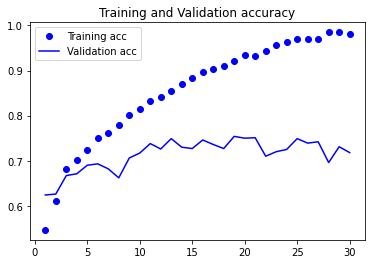

In [25]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()

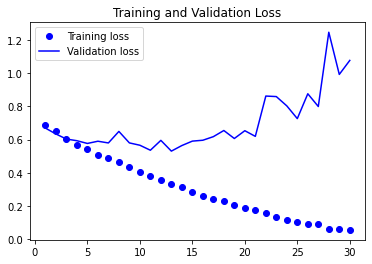

In [26]:
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()

## Data Augmentation

과적합(over fitting)을 막기 위한 가장 쉬운 방법 중 하나가 데이터를 늘리는 것이다. ImageDataGenerator를 활용하여 데이터를 증강시켜보자.

In [12]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

- rotation_range : 랜덤하게 사진을 회전시킬 각도 범위(0 ~ 180 사이)
- width_shift_range, height_shift_range : 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높이에 대한 비율)
- shear_range : 랜덤하게 전단 변환을 적용할 각도 범위(기울기)
- zoom_range : 랜덤하게 사진을 확대할 범위
- horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집음. 수평하게 대칭을 가정할 수 있을 때 사용(ex. 풍경/인물 사진)
- fill_mode : 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략(빈틈 채우는 방법)

In [27]:
from keras.preprocessing import image

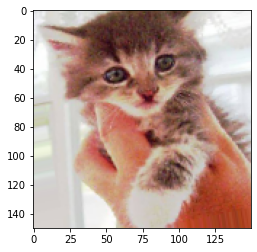

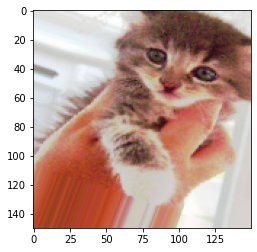

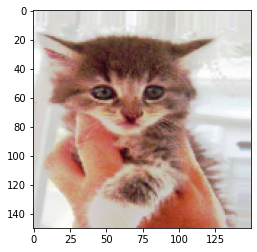

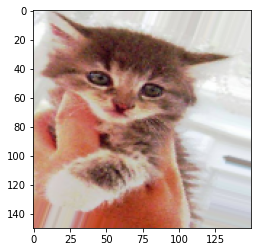

In [26]:
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
  plt.show()

In [28]:
from tensorflow.keras import optimizers

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [33]:
2000/32

62.5

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode = "binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 [==============================] - 18s 184ms/step - loss: 0.6889 - acc: 0.5330 - val_loss: 0.6731 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6756 - acc: 0.5860 - val_loss: 0.6671 - val_acc: 0.5660
Epoch 3/30
100/100 [==============================] - 18s 184ms/step - loss: 0.6691 - acc: 0.5860 - val_loss: 0.7459 - val_acc: 0.5090
Epoch 4/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6633 - acc: 0.6055 - val_loss: 0.6342 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6501 - acc: 0.6155 - val_loss: 0.6362 - val_acc: 0.6270
Epoch 6/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6320 - acc: 0.6325 - val_loss: 0.5961 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 18s 182ms/step - loss: 0.6293 - acc: 0.6380 - val_loss: 0.6506 - val_acc: 0.6030
Epoch 8/30
100/100 [==============================] - 1

## 사전 학습된 모델 사용

사전에 학습된 네트워크의 **합성곱 기반 층**(conv + maxpooling)만 재사용된다.

> why? fully connected 되면 위치 정보를 갖고 있지 않기 때문에 합성곱 층에 의해 학습된 표현이 더 일반적이어서 재사용을 한다.

In [41]:
from tensorflow.keras.applications import VGG16

In [43]:
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

최종 특성 맵의 크기는 (4, 4, 512)이다. 이 특성 위에 완전 연결 층을 놓을 것이다.(Fully connected layer)

이 지점에서 두 가지 방식이 가능하다.
- 새로운 데이터셋에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장. 그 후 데이터를 완전 연결 분류기의 입력으로 사용. 이 방식은 모든 입력 이미지에 대해 합성곱 기반 층을 한 번만 실행하면 되기 때문에 비용이 적게 든다. 하지만 이런 이유 때문에 이 <u>기법에는 데이터 증식을 사용할 수 없음!</u>

- 준비한 모델(conv_base) 위에 Dense 층을 쌓아 확장. 그 후 입력 데이터에서 엔드-투-엔드로 전체 모델을 실행. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있음. 하지만 비용이 첫 번째 방식보다 훨씬 많이 들게 됨.

### 데이터 증식을 사용하지 않는 빠른 특성 추출

ImageDataGenerator를 사용하여 이미지와 레이블을 넘파이 배열로 추출

In [45]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [47]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/keras_book/data/cats_and_dogs_small"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [48]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode="binary"
  )
  
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [49]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [50]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_featrues = np.reshape(test_features, (1000, 4*4*512))

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras import optimizers

In [53]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5)

In [56]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 4ms/step - loss: 0.6124 - acc: 0.6610 - val_loss: 0.4351 - val_acc: 0.8340
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4189 - acc: 0.8175 - val_loss: 0.3555 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3538 - acc: 0.8400 - val_loss: 0.3157 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3067 - acc: 0.8750 - val_loss: 0.2926 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2837 - acc: 0.8815 - val_loss: 0.2883 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2605 - acc: 0.8990 - val_loss: 0.2689 - val_acc: 0.8890
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2420 - acc: 0.9020 - val_loss: 0.2664 - val_acc: 0.9000
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

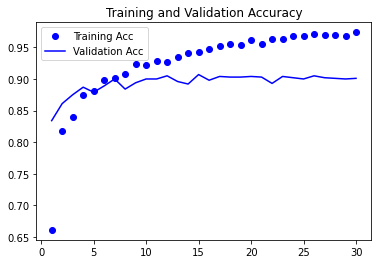

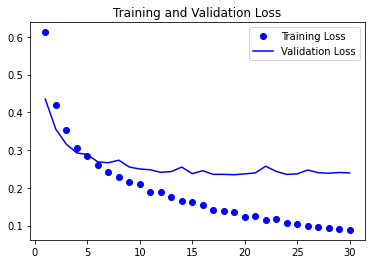

In [59]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()